In [40]:
import os 
import sys
import zipfile
import pandas as pd 
import numpy as np
import sklearn
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [6]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("sklearn version:", sklearn.__version__)


Platform: win32
Python version: 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]
---
matplotlib version: 3.9.2
pandas version: 2.3.1
numpy version: 2.1.2
sklearn version: 1.5.2


In [ ]:
#extracting the zip file
#zip_file = 'archive.zip'
#with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#    zip_ref.extractall('data')


In [ ]:
#loading the data
train_path='data/KDDTrain+.txt'
test_path='data/KDDTest-21.txt'

columns= [
        'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
        'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
        'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
        'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
        'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
        'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
        'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
        'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
        'attack_label', 'difficulty'
    ]

df=pd.read_csv(train_path, names=columns)

In [11]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [12]:
#dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [14]:
print(df['attack_label'].value_counts())


attack_label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


In [ ]:
print(df['protocol_type'].value_counts())


protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64


In [20]:
df_processed=df.copy()
df_processed['lable_binary']=df_processed['attack_label'].apply(lambda x: 0 if x=='normal' else 1)


In [21]:
df_processed['lable_binary'].head()

0    0
1    0
2    1
3    0
4    0
Name: lable_binary, dtype: int64

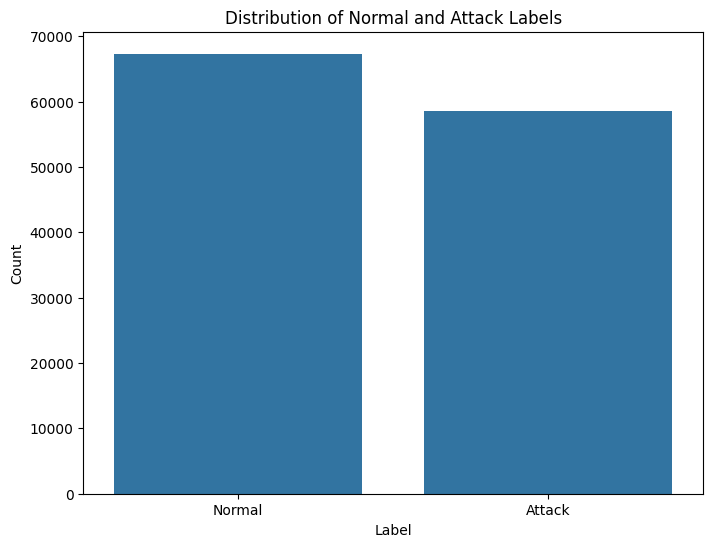

In [27]:
#plotting the attack and normal 
plt.figure(figsize=(8,6))
sns.barplot(x=['Normal','Attack'],y=df_processed['lable_binary'].value_counts())
plt.title('Distribution of Normal and Attack Labels')
plt.savefig('images/attack_normal_distribution.png')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [36]:
categorial_f=['protocol_type', 'service', 'flag'] 
df_processed=pd.get_dummies(df_processed, columns=categorial_f)


KeyError: "None of [Index(['protocol_type', 'service', 'flag'], dtype='object')] are in the [columns]"

In [38]:
#separate the features and the lables
x=df_processed.drop(['attack_label','lable_binary'],axis=1)
y=df_processed['lable_binary']

In [39]:
#spliting the data into train , test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [42]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")


Training set shape: (100778, 123)
Test set shape: (25195, 123)


In [43]:
models={}

models['RandomForest'] = RandomForestClassifier(n_estimators=100,random_state=42)
models['GradientBoosting'] = GradientBoostingClassifier()
models['AdaBoost'] = AdaBoostClassifier()
models['XGBoost'] = XGBClassifier(n_estimators=100, random_state=42)
models['SVC'] = SVC(kernel='rbf',probability=True,random_state=42)

models['KNeighbors'] = KNeighborsClassifier(n_neighbors=5)




In [44]:
results = {}
for name,model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)






Model: RandomForest
Accuracy: 0.9994443341932924
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Confusion Matrix:
 [[13418     4]
 [   10 11763]]
--------------------------------------------------
Model: GradientBoosting
Accuracy: 0.9974201230402858
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Confusion Matrix:
 [[13375    47]
 [   18 11755]]
---------------------------------------------

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 0.9919031553879738
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     13422
           1       0.99      0.99      0.99     11773

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195

Confusion Matrix:
 [[13311   111]
 [   93 11680]]
--------------------------------------------------
Model: XGBoost
Accuracy: 0.999523715022822
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Confusion Matrix:
 [[13419     3]
 [    9 11764]]
--------------------------------------------------
Model: S

,Model,Accuracy
3,XGBoost,0.999524
0,RandomForest,0.999444
5,KNeighbors,0.998055
1,GradientBoosting,0.997420
4,SVC,0.995952
2,AdaBoost,0.991903


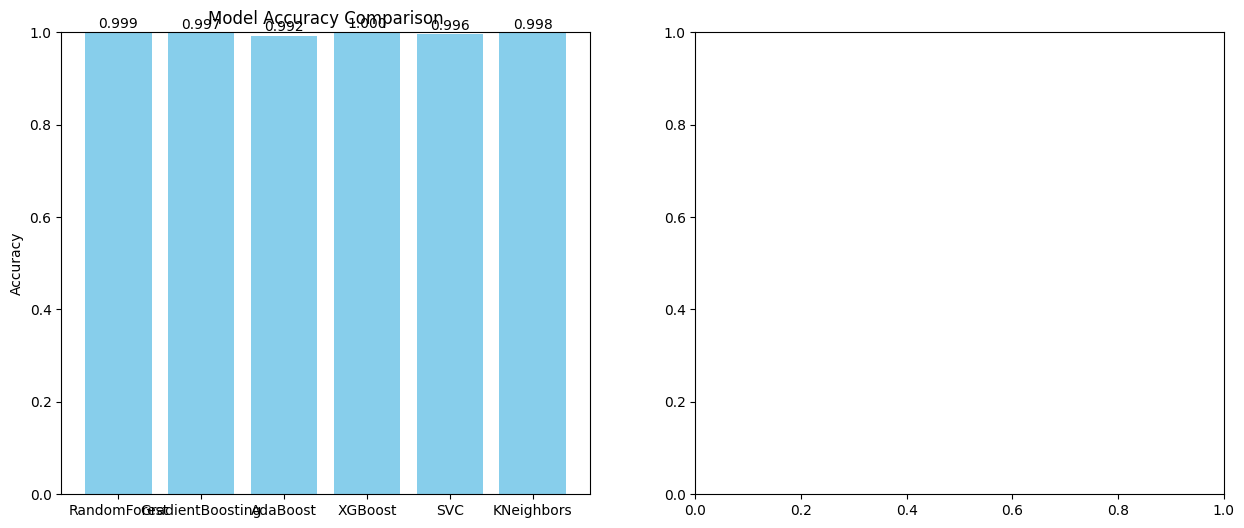

In [45]:
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]


# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,

}).sort_values('Accuracy', ascending=False)

display(comparison_df)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy plot
ax1.bar(model_names, accuracies, color='skyblue')
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.show()



In [ ]:
# Load test data
test_df = pd.read_csv('data/KDDTest+.txt', header=None, names=columns)

# Preprocess test data
test_processed = test_df.copy()
test_processed['label_binary'] = test_processed['label'].apply(lambda x: 0 if x == 'normal' else 1)
test_processed = pd.get_dummies(test_processed, columns=['protocol_type', 'service', 'flag'])
test_processed = test_processed.drop('label', axis=1)

# Separate features and labels
X_test = test_processed.drop('label_binary', axis=1)
y_test = test_processed['label_binary']

# Standardize features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

